Importing Libraries

In [250]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve

Mounting Drive

In [251]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [252]:
df = pd.read_csv('/content/drive/MyDrive/dataset/train.csv')

In [253]:
df.head()

,id,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_5470,var_5471,var_5472,var_5473,var_5474,var_5475,var_5476,var_5477,var_5478,target
0,id_1,0.015625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.355422,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,id_2,0.187500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.150602,...,0.0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0
2,id_3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,NaN,NaN,0.008333,NaN,NaN,0.0,NaN,NaN,0.0,0
3,id_4,0.156250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.018072,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,id_5,0.046875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.096386,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Columns: 5480 entries, id to target
dtypes: float64(5478), int64(1), object(1)
memory usage: 1.0+ GB


In [255]:
features_name = df.columns

Finding Percentage of null values in features

In [256]:
null_features = []
for i in features_name:
  null_features.append(df[i].isnull().sum())

null_features_sum = []
for i in null_features:
  null_features_sum.append((i/25000)*100)


Dropping any feature which have null values

In [257]:
null_features_index = []
for i in range(0,len(null_features_sum)):
  if  null_features_sum[i] > 0:
    null_features_index.append(i)
  else:
    pass

In [258]:
print(len(null_features_index))

5365


In [259]:
df.drop(df.columns[null_features_index],axis = 1,inplace = True)

In [260]:
df.head()

,id,var_4164,var_4169,var_4174,var_4179,var_4362,var_4782,var_4784,var_5115,var_5116,...,var_5326,var_5327,var_5328,var_5329,var_5398,var_5399,var_5400,var_5401,var_5406,target
0,id_1,0.000000,0.294988,0.327235,0.332726,0.0,0.00,0.326927,0.003731,0.000147,...,0.116939,0.0,0.218983,0.376820,0.344804,0.0,0.0,0.000000,0.073171,0
1,id_2,0.015982,0.294380,0.324341,0.328713,0.0,0.05,0.323518,0.025055,0.000147,...,0.132456,0.0,0.226514,0.375987,0.344803,0.0,1.0,0.015982,0.153221,0
2,id_3,0.239726,0.312625,0.329649,0.329227,0.0,0.00,0.341650,0.043412,0.000074,...,0.140751,0.0,0.394623,0.376777,0.370551,0.0,0.0,0.239726,0.168856,0
3,id_4,0.011416,0.298233,0.327778,0.330993,0.0,0.00,0.328160,0.002716,0.000737,...,0.119260,0.0,0.219733,0.376778,0.345510,0.0,0.0,0.011416,0.036273,0
4,id_5,0.109589,0.313851,0.328666,0.329229,0.0,0.00,0.325242,0.008550,0.000574,...,0.123624,0.0,0.231274,0.376779,0.344783,0.0,0.0,0.109589,0.092558,0


In [261]:
id = df['id']
id

0            id_1
1            id_2
2            id_3
3            id_4
4            id_5
           ...   
24995    id_24996
24996    id_24997
24997    id_24998
24998    id_24999
24999    id_25000
Name: id, Length: 25000, dtype: object

Dropping feature id 

In [262]:
df.drop(['id'],axis=1,inplace = True)

In [263]:
df.head()

,var_4164,var_4169,var_4174,var_4179,var_4362,var_4782,var_4784,var_5115,var_5116,var_5117,...,var_5326,var_5327,var_5328,var_5329,var_5398,var_5399,var_5400,var_5401,var_5406,target
0,0.000000,0.294988,0.327235,0.332726,0.0,0.00,0.326927,0.003731,0.000147,0.004551,...,0.116939,0.0,0.218983,0.376820,0.344804,0.0,0.0,0.000000,0.073171,0
1,0.015982,0.294380,0.324341,0.328713,0.0,0.05,0.323518,0.025055,0.000147,0.015293,...,0.132456,0.0,0.226514,0.375987,0.344803,0.0,1.0,0.015982,0.153221,0
2,0.239726,0.312625,0.329649,0.329227,0.0,0.00,0.341650,0.043412,0.000074,0.191782,...,0.140751,0.0,0.394623,0.376777,0.370551,0.0,0.0,0.239726,0.168856,0
3,0.011416,0.298233,0.327778,0.330993,0.0,0.00,0.328160,0.002716,0.000737,0.006000,...,0.119260,0.0,0.219733,0.376778,0.345510,0.0,0.0,0.011416,0.036273,0
4,0.109589,0.313851,0.328666,0.329229,0.0,0.00,0.325242,0.008550,0.000574,0.020002,...,0.123624,0.0,0.231274,0.376779,0.344783,0.0,0.0,0.109589,0.092558,0


Splitting dataset into independent variables(x) and dependent variables(y)

In [264]:
x = df.drop(['target'],axis=1)
x.head()

,var_4164,var_4169,var_4174,var_4179,var_4362,var_4782,var_4784,var_5115,var_5116,var_5117,...,var_5325,var_5326,var_5327,var_5328,var_5329,var_5398,var_5399,var_5400,var_5401,var_5406
0,0.000000,0.294988,0.327235,0.332726,0.0,0.00,0.326927,0.003731,0.000147,0.004551,...,0.000000,0.116939,0.0,0.218983,0.376820,0.344804,0.0,0.0,0.000000,0.073171
1,0.015982,0.294380,0.324341,0.328713,0.0,0.05,0.323518,0.025055,0.000147,0.015293,...,0.039898,0.132456,0.0,0.226514,0.375987,0.344803,0.0,1.0,0.015982,0.153221
2,0.239726,0.312625,0.329649,0.329227,0.0,0.00,0.341650,0.043412,0.000074,0.191782,...,0.000000,0.140751,0.0,0.394623,0.376777,0.370551,0.0,0.0,0.239726,0.168856
3,0.011416,0.298233,0.327778,0.330993,0.0,0.00,0.328160,0.002716,0.000737,0.006000,...,0.000000,0.119260,0.0,0.219733,0.376778,0.345510,0.0,0.0,0.011416,0.036273
4,0.109589,0.313851,0.328666,0.329229,0.0,0.00,0.325242,0.008550,0.000574,0.020002,...,0.000000,0.123624,0.0,0.231274,0.376779,0.344783,0.0,0.0,0.109589,0.092558


In [265]:
y=df['target']
y

0        0
1        0
2        0
3        0
4        0
        ..
24995    0
24996    0
24997    0
24998    1
24999    1
Name: target, Length: 25000, dtype: int64

Removing Outliers from dpednent variables

In [266]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range = Q1-(1.5 * IQR)
    upper_range = Q3+(1.5 * IQR)
    return lower_range,upper_range

In [267]:
for i in range(0,113):
  low,up=remove_outlier(x[x.columns[i]])
  x[x.columns[i]]=np.where(x[df.columns[i]]>up,up,x[x.columns[i]])
  x[x.columns[i]]=np.where(x[x.columns[i]]<low,low,x[x.columns[i]])

Splitting dataset into train and test

In [268]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 5)

In [269]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17500 entries, 8771 to 2915
Columns: 113 entries, var_4164 to var_5406
dtypes: float64(113)
memory usage: 15.2 MB


In [270]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7500 entries, 12653 to 18018
Columns: 113 entries, var_4164 to var_5406
dtypes: float64(113)
memory usage: 6.5 MB


Finding Correlation of features

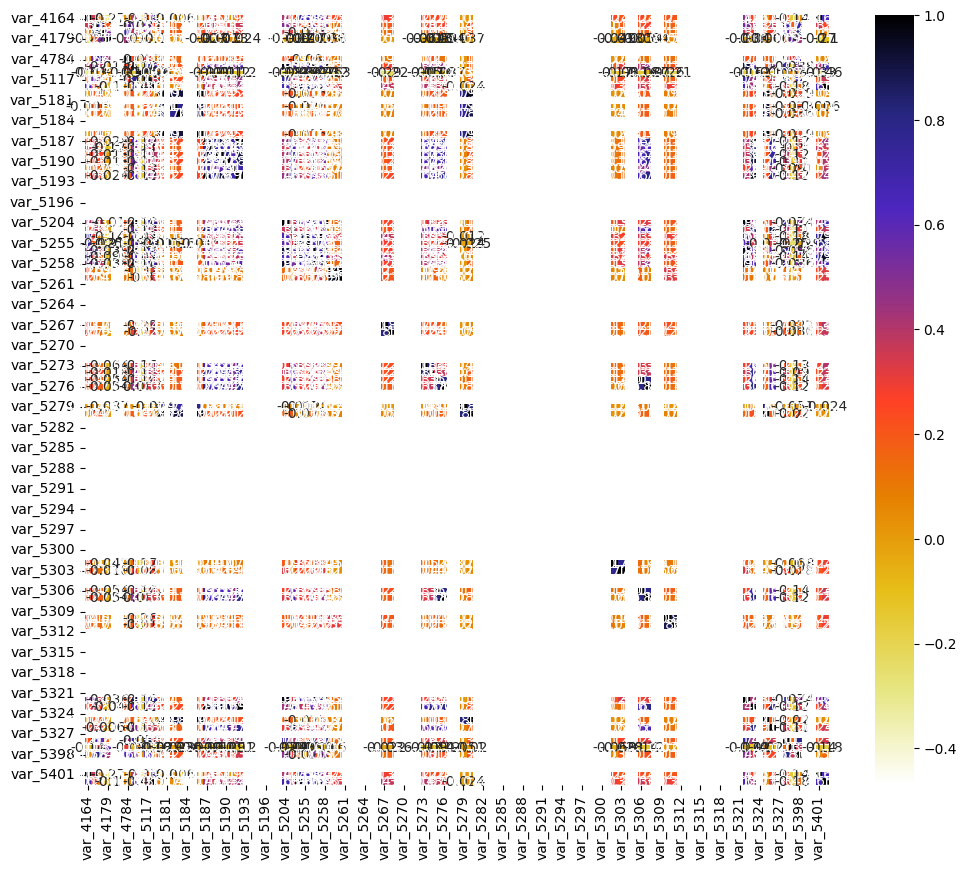

In [271]:
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor ,annot=True, cmap = plt.cm.CMRmap_r)
plt.show()

In [272]:
def correlation(dataset, threshold):
  col_corr = set()
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j])>threshold:
        colname = corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr

In [273]:
corr_features = correlation(X_train,0.7)
len(set(corr_features))

36

Removing features whcih are collinear

In [274]:
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)

In [275]:
X_train.head()

,var_4164,var_4169,var_4179,var_4362,var_4782,var_5115,var_5116,var_5118,var_5180,var_5181,...,var_5317,var_5318,var_5319,var_5320,var_5321,var_5324,var_5327,var_5329,var_5399,var_5400
8771,0.011416,0.314467,0.329887,0.0,0.0,0.013173,0.001102,0.010632,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.376845,0.0,0.0
18684,0.029680,0.294946,0.329230,0.0,0.0,0.001547,0.001031,0.008755,0.005369,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.376779,0.0,0.0
4204,0.111872,0.293490,0.329285,0.0,0.0,0.004670,0.000003,0.097561,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.376777,0.0,0.0
6546,0.038813,0.298478,0.328836,0.0,0.0,0.010021,0.000015,0.132583,0.019260,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.376736,0.0,0.0
11999,0.061644,0.296936,0.329234,0.0,0.0,0.002966,0.000206,0.065666,0.021752,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.376784,0.0,0.0


In [276]:
X_test.head()

,var_4164,var_4169,var_4179,var_4362,var_4782,var_5115,var_5116,var_5118,var_5180,var_5181,...,var_5317,var_5318,var_5319,var_5320,var_5321,var_5324,var_5327,var_5329,var_5399,var_5400
12653,0.075342,0.303617,0.329887,0.0,0.0,0.010462,0.000059,0.081926,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.376845,0.0,0.0
22745,0.050228,0.302237,0.329243,0.0,0.0,0.010661,0.000147,0.078174,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.376777,0.0,0.0
18675,0.022831,0.302203,0.329244,0.0,0.0,0.029736,0.001102,0.037523,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.376796,0.0,0.0
23488,0.061644,0.303430,0.328836,0.0,0.0,0.004764,0.000236,0.032520,0.044156,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.376736,0.0,0.0
5580,0.180365,0.306232,0.329356,0.0,0.0,0.029736,0.000015,0.217636,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.376736,0.0,0.0


Logistic regression Model

In [277]:
classifier = LogisticRegression(random_state = 5)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=5)

In [278]:
y_pred = classifier.predict(X_test)

In [279]:
print ("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  0.8526666666666667


In [280]:
y_pred_probs = classifier.predict_proba(X_test)[:, 1]

In [281]:
# Calculate roc_auc_score
print(roc_auc_score(y_test, y_pred_probs))

# Calculate the confusion matrix
print(confusion_matrix(y_test, y_pred))

# Calculate the classification report
print(classification_report(y_test, y_pred))

0.6004164735600139
[[6395    0]
 [1105    0]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      6395
           1       0.00      0.00      0.00      1105

    accuracy                           0.85      7500
   macro avg       0.43      0.50      0.46      7500
weighted avg       0.73      0.85      0.78      7500



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
